In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X, Y = make_circles(n_samples=500, noise=0.05)

In [3]:
print(X.shape, Y.shape)

(500, 2) (500,)


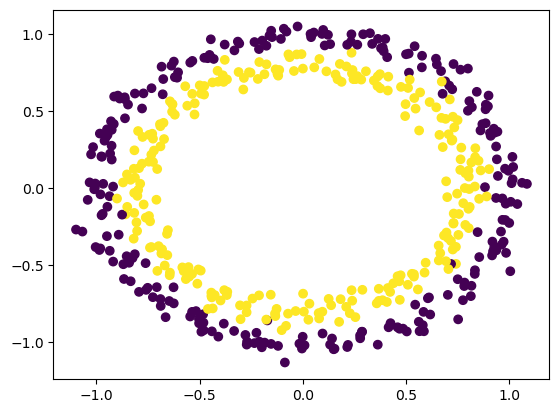

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [5]:
def phi(X):
    """Non Linear Transformation"""
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0], 3))
    X_[:, :-1] = X
    X_[:, -1] = X3
    
    return X_

In [6]:
X_ = phi(X)

In [7]:
X_[:3, :]

array([[ 0.21917972, -1.01846185,  1.0853043 ],
       [ 0.76830838,  0.26295025,  0.65944061],
       [ 0.0769664 , -0.81215254,  0.66551557]])

In [8]:
# plot the transformed points
def plot3d(X):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X[:, 2]
    
    ax.scatter(X1, X2, X3, zdir='z', s=20, c=Y, depthshade=True)
    plt.show()
    
    return ax

In [9]:
%matplotlib widget


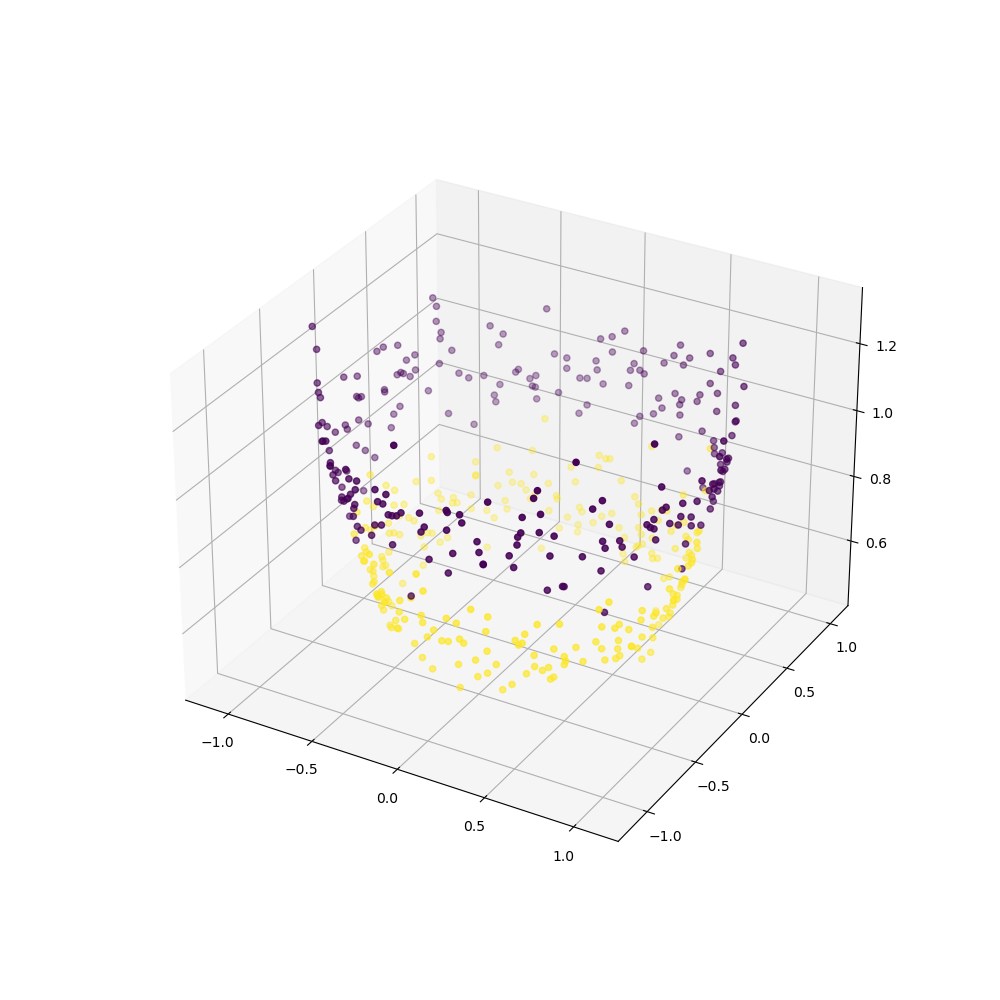

<Axes3DSubplot: >

In [10]:
plot3d(X_)

### Logistic Classifier

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
lr = LogisticRegression()

In [18]:
acc = cross_val_score(lr, X, Y, cv=5).mean()

In [19]:
print("accuracy is", acc*100)

accuracy is 47.79999999999999


In [15]:
cross_val_score(lr, X, Y, cv=5)

array([0.48, 0.48, 0.5 , 0.45, 0.48])

In [16]:
 # the logisitc regression in 2D datapoint gives around 50% accuracy

### logistic classifier in higher dimension space

In [20]:
accH = cross_val_score(lr, X_, Y, cv=5).mean()

In [21]:
print("accuracy is", accH*100)

accuracy is 97.0


In [22]:
## lets visualize the trained model

In [23]:
lr.fit(X_, Y)

LogisticRegression()

In [25]:
W = lr.coef_

In [26]:
bias = lr.intercept_

In [27]:
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))

In [28]:
zz = -(W[0,0]*xx + W[0, 1]*yy +bias)/W[0,2]

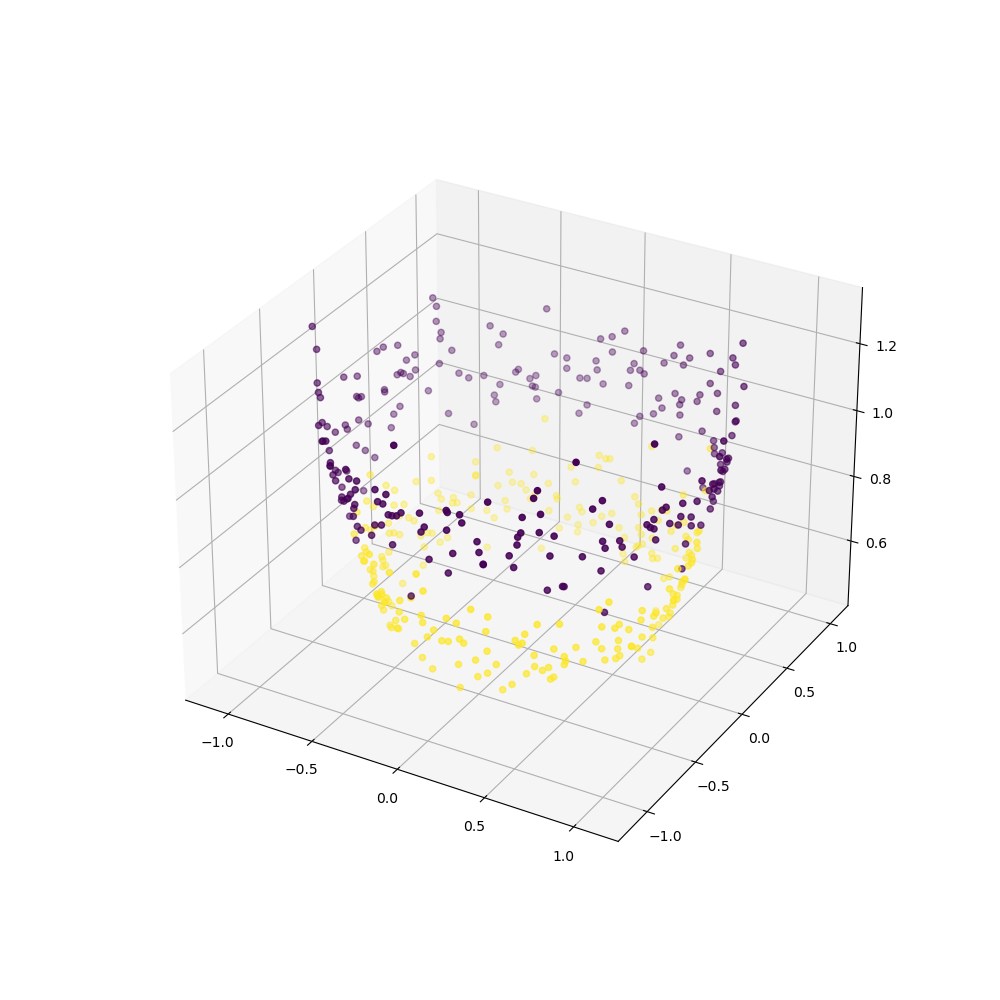

In [29]:
ax = plot3d(X_)

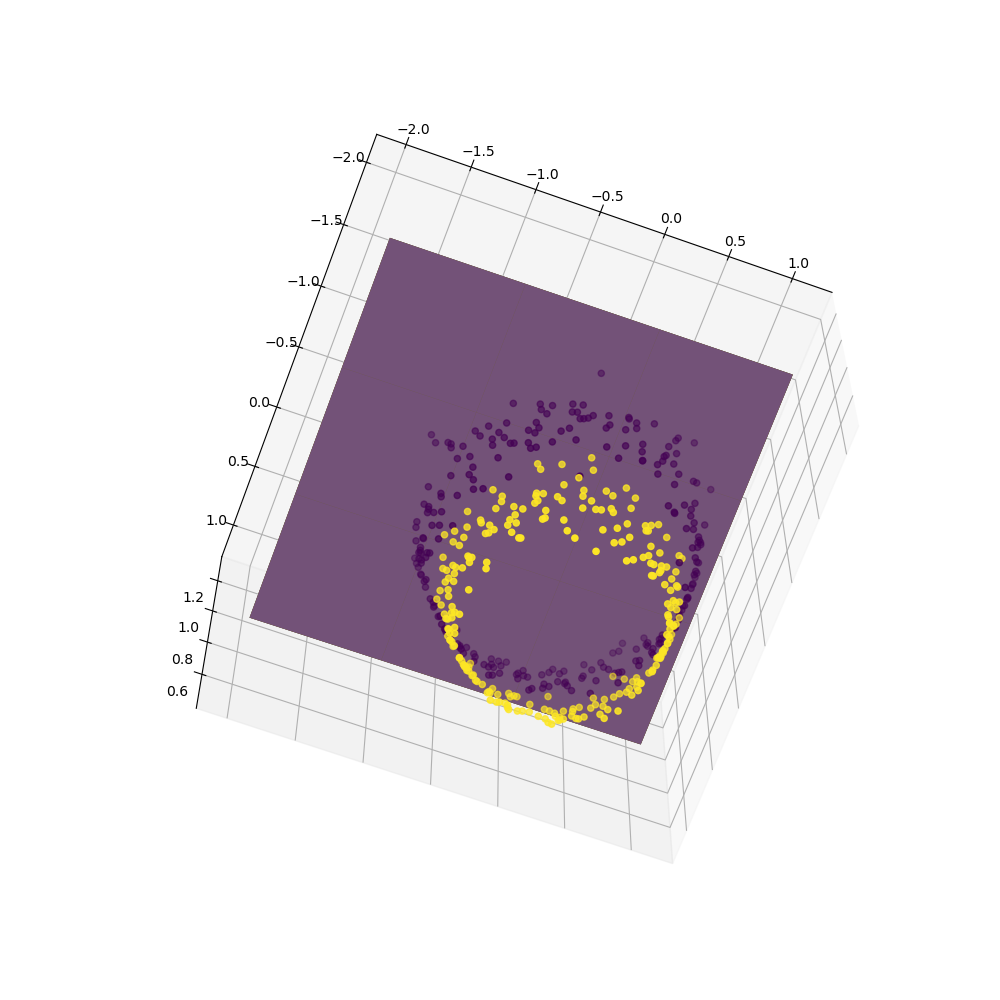

In [34]:
ax.plot_surface(xx, yy, zz, alpha = 0.8)
plt.show()